![Linux Academy](la-logo.png)
<hr/>

<center><h1>Random Forest Classifier Using scikit-learn</h1></center>

|![Sparky](sparky.png)|![Penny](penny.png)|
|:-------------------:|:-------------------:|
|Sparky the Dog|Penny the Cat|

<center><h2>Are You Likely to Be a Dog Person or a Cat Person?</h2></center>

# Introduction

In this Linux Academy hands-on lab, we take a quick look at __scikit-learn__, a machine learning framework.

Designed to be native to Python, scikit-learn contains various classification, regression, and clustering algorithms, including __random forests__ which we use in this lab.

# Scenario

We run a multinational pet store franchise, and we want to know if people are more into dogs or cats. We've contracted a survey company to collect information on 199 people, including if they think themselves to be 'dog people' or 'cat people'. The questions they asked were:

- Do you like walking?
- Do you like running?
- What is your favorite color?
- How many miles do you run in a day?
- Do you like dogs or cats?

Clearly this is a fictitious dataset. If this were real, we'd fire the survey company!

We're going to use a random forest algorithm trained with our survey data to build a model that classifies new customers as dog or cat people.

We do this using standard Python libraries such as NumPy, Pandas, and matplotlib along with scikit-learn.

## scikit-learn
### Machine Learning in Python

- Simple and efficient tools for data mining and data analysis.
- Accessible to everybody and reusable in various contexts.
- Built on NumPy, SciPy, and matplotlib.
- Open source and commercially usable - BSD license.

_(Source: https://scikit-learn.org/)_

# How to Use This Lab

This is a follow-along lab. That is to say the code in this Jupyter Notebook should be complete, and you could simply execute the notebook to get a result. However, watch along with the video to learn more about what is happening in the code and then take the time to experiment with the code; make changes, break it, fix it, and learn!

# 1) The Libraries

In [1]:
# Most of these includes are pretty standard 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# If you want to be able to reproduce results, we can uncomment the next line:
# np.random.seed(123)

# Libraries like to warn us of things, but we'll 
# turn this off for now.
pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# These two includes help us render a graph
from subprocess import call
from IPython.display import Image

# 2) Load the Data [pandas]

We have a dataset created from a set of people who either liked dogs or cats. Clearly this is a fictional dataset and some of the data is useless. But let's see what we can learn from it.

First we load the data.

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(10)

,walking,running,color,distance_walked,dogs_cats
0,1,1,red,1,1
1,1,1,blue,2,1
2,1,1,green,3,1
3,1,1,blue,4,1
4,1,1,blue,5,1
5,1,1,red,6,1
6,1,1,green,7,1
7,1,1,green,8,1
8,1,1,blue,9,1
9,1,1,red,1,1


Let's change the names of some of the columns, including marking ```dogs_cats``` as an out label.

In [4]:
df.columns = ['walk', 'run', 'color', 'distance', 'label']

With the data loaded, let's check to see what data types we have.

In [5]:
df.dtypes

walk         int64
run          int64
color       object
distance     int64
label        int64
dtype: object

Some of those aren't quite what we want. The code below changes some to boolean values and the color into a categorical variable.

In [6]:
df['walk'] = df['walk'].astype('bool')
df['run'] = df['run'].astype('bool')
df['color'] = df['color'].astype('category')
df['label'] = df['label'].astype('bool')

In [7]:
df.dtypes

walk            bool
run             bool
color       category
distance       int64
label           bool
dtype: object

The algorithm will not understand color as a list of strings. With the data as it is now, we can expect to get the following error when we trt to fit the data:
```ValueError: could not convert string to float: 'green'```
So we use the ```get_dummies``` command to perform a one hot encoding process directly into the dataframe.

In [8]:
df = pd.get_dummies(df, prefix=['color'])

In [9]:
df.head(10)

,walk,run,distance,label,color_blue,color_green,color_red
0,True,True,1,True,0,0,1
1,True,True,2,True,1,0,0
2,True,True,3,True,0,1,0
3,True,True,4,True,1,0,0
4,True,True,5,True,1,0,0
5,True,True,6,True,0,0,1
6,True,True,7,True,0,1,0
7,True,True,8,True,0,1,0
8,True,True,9,True,1,0,0
9,True,True,1,True,0,0,1


<a id='section3'></a>

# 3) Training [scikit-learn]

Now we start to use scikit-learn. First we use ```train_test_split``` to split our data into training data and testing data. We ask for a 80/20 split between training and testing.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', 1), df['label'], test_size = .2, random_state=10)

The time has come to train. First, we create the model. We're using the ```RandomForestClassifier``` and we set some paramters here. There are many more parameters. You can read about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In [11]:
model = RandomForestClassifier(max_depth=5)

Now we call ```fit``` and pass in the training data.

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

That was quick. Now, let's see what we got.

# 4) Testing and Analysis [scikit-learn]

First, we grab the estimator from the trained model.

In [13]:
estimator = model.estimators_[0]
feature_names = [i for i in X_train.columns]

Then we use ```export_graphviz``` to get a graphical representation of __one of__ the trees in our forest. __After this code block has run, wait a moment for the graph to appear.__

In [14]:
export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                rounded = True,
                filled = True)

# Use CLI Graphviz to create a png file from our graph data:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

Now let's run our testing data through the model.

In [15]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

To see how it performed, let's use ```confusion_matrix``` to create a confusion matrix from the testing.

In [16]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[23,  3],
       [11,  3]])

That's not the easiest confusion matrix to look at. Let's add some style to it using the ```seaborn``` library.

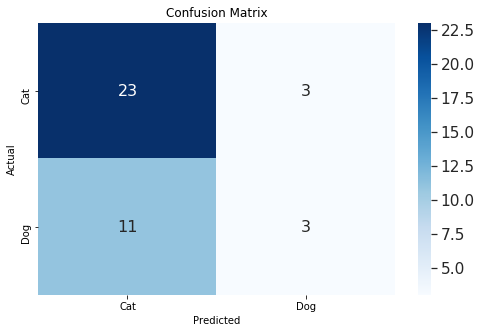

In [17]:
y_true = ["Dog", "Cat"]
y_pred = ["Dog", "Cat"]
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

df_cm.dtypes

plt.figure(figsize = (8,5))
plt.title('Confusion Matrix')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

And from the confusion matrix, let's calculate **sensitivity** and **specificity**.

In [18]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6764705882352942
Specificity :  0.5


Now let's look at the __ROC__ graph.

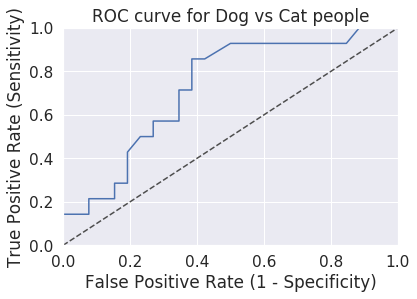

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Dog vs Cat people')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

And calculate the __AUC__.

In [20]:
auc(fpr, tpr)

0.7225274725274725

# 5) Try It Yourself

Enter some values into the code below and make an inference.

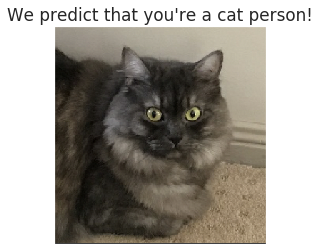

In [21]:
# Do you like walking?  1=yes, 0=no
like_walking = 0

# Do you like running?  1=yes, 0=no
like_running = 1

# How far do you run in a day?
distance_run = 10

# What is your favourite color? Answer ONLY ONE with a 1
red = 0
green = 1
blue = 0

# Get the prediction:
prediction = model.predict([[like_walking, like_running, distance_run, red, green, blue]])

# The following is all display code:
if prediction[0]:
    animal = 'dog'
    pic = 'sparky.png'
else:
    animal = 'cat'
    pic = 'penny.png'
    
img=mpimg.imread(pic)
imgplot = plt.imshow(img)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("We predict that you're a %s person!" % animal)
plt.show()


Did it get the answer right? Probably not, but the data is flawed.

That's the end of this Linux Academy hands-on lab. Thanks!